In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
Airlines=pd.read_csv('Airlines+Data.csv')
Airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [3]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


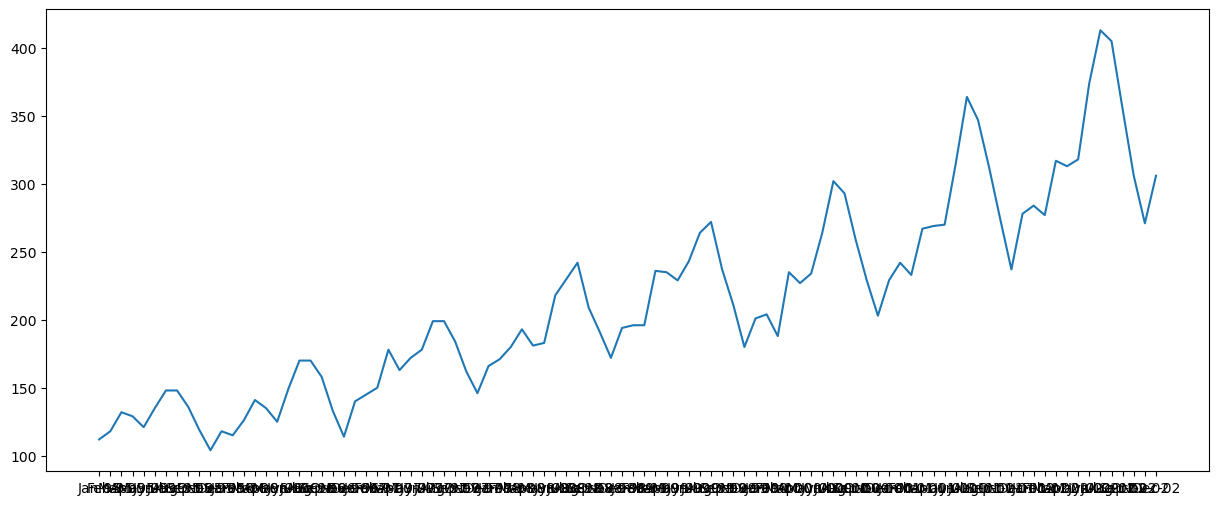

In [4]:
#Airlines Passengers plot()
plt.figure(figsize=(15,6))
plt.plot(Airlines["Month"], Airlines["Passengers"])

In [5]:
#Splitting data into Train & Test
Train = Airlines.head(96)
Test = Airlines.tail(25)
Test.tail(25)

,Month,Passengers
71,Dec-00,229
72,Jan-01,242
73,Feb-01,233
74,Mar-01,267
75,Apr-01,269
76,May-01,270
77,Jun-01,315
78,Jul-01,364
79,Aug-01,347
80,Sep-01,312


# Time series Decomposition Plot

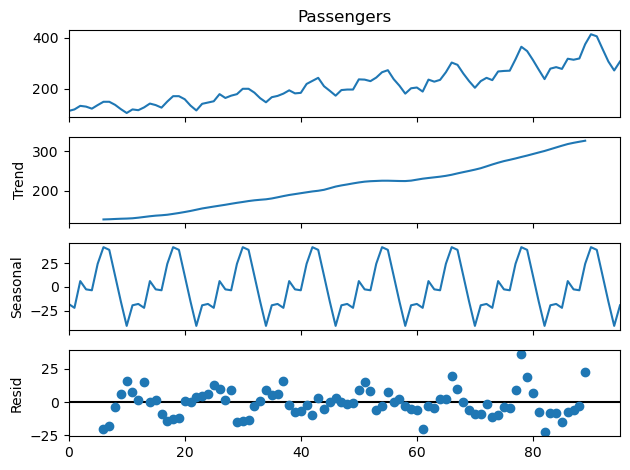

In [6]:
decompose_ts_add = seasonal_decompose(Airlines.Passengers,period= 12)
decompose_ts_add.plot()
plt.show()

# Defining MAPE

In [7]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [8]:
Test

,Month,Passengers
71,Dec-00,229
72,Jan-01,242
73,Feb-01,233
74,Mar-01,267
75,Apr-01,269
76,May-01,270
77,Jun-01,315
78,Jul-01,364
79,Aug-01,347
80,Sep-01,312


In [9]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.7)
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses["Exp_Smoothing"],Test.Passengers) 
#pred_ses["Exp_Smoothing"]

C:\Users\pirfa\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


9.607868484683303

In [10]:
# Mape = 9.6%    Hence the model is good

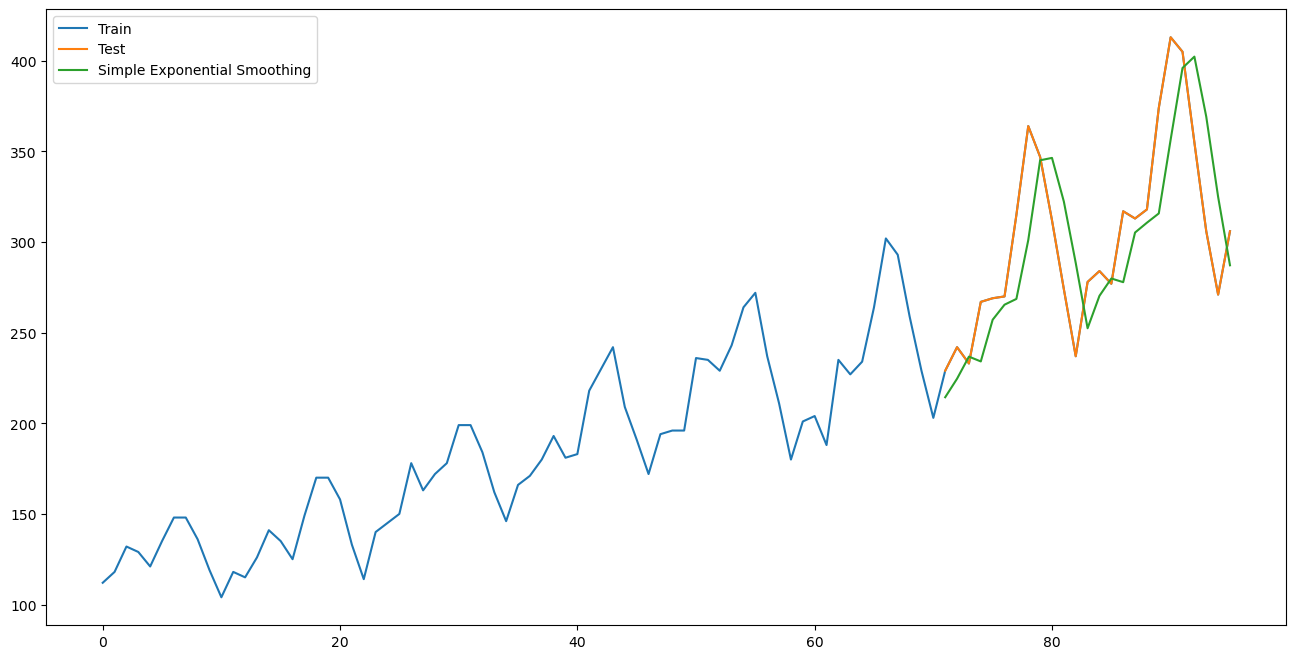

In [11]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_ses["Exp_Smoothing"], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

# Final Model by combining train and test

In [12]:
hwe_model_add_add = ExponentialSmoothing(Airlines.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()

In [13]:
#Forecasting for next 10 time periods
future_data = hwe_model_add_add.forecast(10)
future_data

96     319.235250
97     311.528363
98     350.278666
99     346.984953
100    351.844997
101    403.925669
102    440.566746
103    427.446408
104    376.628091
105    329.767424
dtype: float64